Import libraries and declare program constants

In [1]:
import sys
import os
import time
import argparse
import matplotlib.pyplot as plt
from numpy import double


#-----------------------import libraries for Spectrum analyzer----------------#
sys.path.insert(0, os.path.abspath(os.path.join('..') + '/scripts/spec_ana/'))
from sa_fsh8_read_noise_power_density import SA_SOCK        # Import the Spectrum Analyser Socket Function
from sa_fsh8_read_noise_power_density import pow_values
from sa_fsh8_read_noise_power_density import freq_values

# -----------------Connection Settings----------------------
SA_HOST = '10.8.88.138'             # fsh8 spectrum analyzer IP temporary
SA_PORT = 5555                      # fsh8 spectrum analyzer port 18? 23?
SA_ADDRESS = (SA_HOST, SA_PORT)
#-----------------------------------------------------------
# ----------------Initialization of Variables---------------    
DEFAULT_TIMEOUT = 1        # Default socket timeout
RF_OFF = 0
RF_ON = 1

# -----------------SA INITIALIZATION-----------------

#-----------------SA_FSH8 initialization Variables----------
NUMPOINTS = 631   # Number of measurement points (Max=625)

Input test parameters

In [2]:
freq_start = 0  # the start frequency of the spectrum analyzer (Hz) e.g. 100000000 or 100e6, integer with no units [100 MHz, minimum 9 kHz]
freq_stop = 6e9 # the stop frequency of the spectrum analyzer (Hz) e.g. 2000000000 or 2e9, integer with no units [2 GHz, maximum 8 GHz]
res_bw = 3e6    # the resolution bandwidth of the spectrum analyzer (Hz) e.g. 3000000 or 3e6, integer with no units [3 MHz]
vid_bw = 3e2     # the video bandwidth of the spectrum analyzer (Hz) e.g. 300, integer with no units [30 Hz]
marker_freq = 3e9  # the frequency of interest on the spectrum analyzer (Hz) e.g. 10000000 or 10e6, integer with no units [10 MHz, minimum 9 kHz, maximum 8 GHz]')


Setup the setup the Spectrum Analyzer

In [3]:
#------------------------SA_FSH8 Setup-------------------------#
def setupSA():
    print('/------Setup spectrum analyser---------/')
    specAnal = SA_SOCK()
    specAnal.connectSpecAna((SA_ADDRESS))
    specAnal.setSpecAnaSweep(freq_start, freq_stop, NUMPOINTS)
    #rbw = res_bw         # Resolution BW of spectrum analyser
    #vbw = vid_bw        # Video BW of spectrum analyser
    specAnal.setSpecAnaBandwidth('off', res_bw, 'off', vid_bw) # Set the SA Resolution bandwidth mode to Manual, 100 KHz. Set the Video BW to Manual, 100 KHz 
    specAnal.setSpecAnaAmplitude(-25, 5) 
    specAnal.setSpecAnaDetector('rms')
    specAnal.setSpecAnaSweepTime('15s')
    specAnal.setMarkerFunction(marker_freq)
    print(f'Frequency of Interest = {marker_freq/1e9} GHz')
    print('/------End of Setup Spectrum Analyzer---------/')
    return specAnal
        

In [4]:
#------------------------------ PLOT ---------------------------#
def plotTrace(x_axis, y_axis, x_label, y_label, title, label, y_max): 
    ''' Plot response

    This function plots the power vs frequency filter response 

    @params:    
        freq_values: integer list [in Hz]
        power_value: integer list [in dBm]
    '''
    plt.figure(figsize=(10,10))
    plt.plot(x_axis, y_axis, 'r', label = label)
    plt.legend()
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.ylim(ymax=y_max) 
    plt.ylim(ymin=y_max*6) 
    plt.title(title, fontsize = 16)
    plt.grid()
    plt.show()

In [5]:
print('/--------- Running main Code ---------/') 
time.sleep(1) 
SpecAna = setupSA()
time.sleep(1) 
run_time_delay = float(SpecAna.requestSpecAnaData('SWE:TIME?').decode()) * float(10)
print(f'run_time_delay = {run_time_delay}')
y_max = double(SpecAna.requestSpecAnaData('DISP:WIND:TRAC:Y:RLEV?'))
for count in range(0, int(run_time_delay), 10):
    time.sleep(10)          # wait for sweep to complete  
    print(f'count = {count}...')
noise_dbm_hz = double(SpecAna.requestSpecAnaData('CALC:MARK:FUNC:NOIS:RES?'))
SpecAna.getSpecAnaTraceParams(freq_start, freq_stop)
print('Power and Frequency Values acquired.')

/--------- Running main Code ---------/
/------Setup spectrum analyser---------/
Connected to: b'Rohde&Schwarz,FSH8,106260/028,V3.30'
SA Start Freq: 0.0 MHz, Stop Freq: 6000.0 MHz, Points: 631
SA RBW set to AUTO 0, RBW = 3000.0 kHz
SA VBW set to AUTO 0, VBW = 0.3 kHz
SA amplitude reference level set to REF -25.0 dBm
SA input attenuator set to 5.0 dB
SA trace mode set to = WRIT
SA detector mode set to = RMS
Frequency of Interest = 3.0 GHz
/------End of Setup Spectrum Analyzer---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Power and Frequency Values acquired.


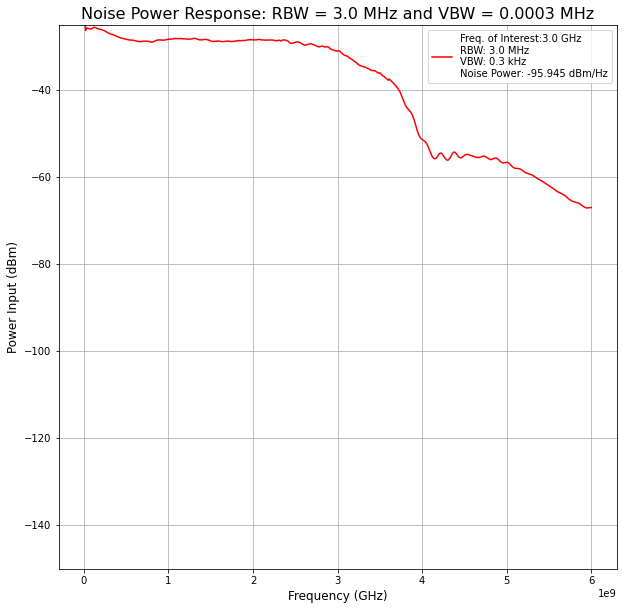

Displayed plot...
End of program.


In [6]:
# Plot the results
plotTrace(freq_values, pow_values, 'Frequency (GHz)', 'Power Input (dBm)', f'Noise Power Response: RBW = {res_bw/1e6} MHz and VBW = {vid_bw/1e6} MHz', f'Freq. of Interest:{marker_freq/1e9} GHz\nRBW: {res_bw/1e6} MHz\nVBW: {vid_bw/1e3} kHz\nNoise Power: {noise_dbm_hz} dBm/Hz', y_max)
print('Displayed plot...')
print('End of program.')

In [7]:
res_bw = [1e6, 3e6, 5e6]  # the resolution bandwidth of the spectrum analyzer (Hz) e.g. 3000000 or 3e6, integer with no units [3 MHz]
vid_bw = [3e2, 10e2, 30e2] # the video bandwidth of the spectrum analyzer (Hz) e.g. 30, integer with no units [30 Hz]   
marker_freq = [10e6, 1.5e9, 3e9] # the frequency of interest on the spectrum analyzer (Hz) e.g. 10000000 or 10e6, integer with no units [10 MHz, minimum 9 kHz, maximum 8 GHz]')



In [ ]:
#SpecAna = setupSA()
SpecAna.setSpecAnaDetector('rms')
SpecAna.setMarkerFunction(marker_freq)
for i in marker_freq:
    if (i == 10e6) or (i == 3e9):
        freq_start = 0            
        freq_stop = 6e9           
        print(f'Frequency of Interest = {i/1e6} MHz')
        SpecAna.setSpecAnaSweep(freq_start, freq_stop, NUMPOINTS)
        SpecAna.setSpecAnaAmplitude(-25, 5)
        SpecAna.setSpecAnaSweepTime('15s')
        for (j,k) in zip(res_bw, vid_bw):
            print(f'Testing with RBW = {j} MHz and VBW = {k} MHz')
            SpecAna.setSpecAnaBandwidth('off', j, 'off', k)
            print('/--------- Running main Code ---------/') 
            time.sleep(1) 
            time.sleep(1) 
            run_time_delay = float(SpecAna.requestSpecAnaData('SWE:TIME?').decode()) * float(10)
            print(f'run_time_delay = {run_time_delay}')
            y_max = double(SpecAna.requestSpecAnaData('DISP:WIND:TRAC:Y:RLEV?'))
            for count in range(0, int(run_time_delay), 10):
                time.sleep(10)          
                print(f'count = {count}...')
            noise_dbm_hz = double(SpecAna.requestSpecAnaData('CALC:MARK:FUNC:NOIS:RES?'))
            SpecAna.getSpecAnaTraceParams(freq_start, freq_stop)
            print('Power and Frequency Values acquired.')   
            
            for test in range(0,len(res_bw)):
                plt.figure(figsize=(10, 10))
                plt.plot(freq_values, pow_values, 'r', label = f'Freq. of Interest:{marker_freq/1e9} GHz\nResolution BW: {res_bw[test]/1e6} MHz\nVideo BW:{vid_bw[test]/1e6} MHz\nNoise Power: {noise_dbm_hz} dBm/Hz')
                plt.legend()
                plt.xlabel('Frequency (GHz)', fontsize = 16)
                plt.ylabel('Power Input (dBm)', fontsize = 16)
                plt.title(f'Noise Power Density with RBW = {(res_bw[test])/1e6} MHz and VBW = {(vid_bw[test])/1e3} kHz', fontsize = 20)
                plt.grid()
                plt.show()
            
    elif i == 1.5e9:      
        freq_start = 0            
        freq_stop = 3e9          
        SpecAna.setSpecAnaSweep(freq_start, freq_stop, NUMPOINTS)
        SpecAna.setSpecAnaAmplitude(-24, 15)
        SpecAna.setSpecAnaSweepTime('7.6s')
        for (j,k) in zip(res_bw, vid_bw):
            print(f'Testing with RBW = {j} MHz and VBW = {k} MHz')
            SpecAna.setSpecAnaBandwidth('off', j, 'off', k)
            print('/--------- Running main Code ---------/') 
            time.sleep(1) 
            time.sleep(1) 
            run_time_delay = float(SpecAna.requestSpecAnaData('SWE:TIME?').decode()) * float(10)
            print(f'run_time_delay = {run_time_delay}')
            y_max = double(SpecAna.requestSpecAnaData('DISP:WIND:TRAC:Y:RLEV?'))
            for count in range(0, int(run_time_delay), 10):
                time.sleep(10)          # wait for sweep to complete  
                print(f'count = {count}...')
            noise_dbm_hz = double(SpecAna.requestSpecAnaData('CALC:MARK:FUNC:NOIS:RES?'))
            SpecAna.getSpecAnaTraceParams(freq_start, freq_stop)
            print('Power and Frequency Values acquired.') 
        
            for test in range(0,len(res_bw)):
                plt.figure(figsize=(10, 10))
                plt.plot(freq_values, pow_values, 'r', label = f'Freq. of Interest:{marker_freq/1e9} GHz\nResolution BW: {res_bw[test]/1e6} MHz\nVideo BW:{vid_bw[test]/1e6} MHz\nNoise Power: {noise_dbm_hz} dBm/Hz')
                plt.legend()
                plt.xlabel('Frequency (GHz)', fontsize = 16)
                plt.ylabel('Power Input (dBm)', fontsize = 16)
                plt.title(f'Noise Power Density with RBW = {(res_bw[test])/1e6} MHz and VBW = {(vid_bw[test])/1e3} kHz', fontsize = 20)
                plt.grid()
                plt.show()
    
        print('/------End of Setup Spectrum Analyzer---------/')


SA trace mode set to = WRIT
SA detector mode set to = RMS
Frequency of Interest = 10.0 MHz
SA Start Freq: 0.0 MHz, Stop Freq: 6000.0 MHz, Points: 631
SA amplitude reference level set to REF -25.0 dBm
SA input attenuator set to 5.0 dB
Testing with RBW = 1000000.0 MHz and VBW = 300.0 MHz
SA RBW set to AUTO 0, RBW = 1000.0 kHz
SA VBW set to AUTO 0, VBW = 0.3 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
